In [2]:
import numpy as np 
import pandas as pd
import simpy
import matplotlib.pyplot as plt
import networkx as nx

## 일단 특정 프로세스가 있고, 조직구조가 있을때, 로그가 어떻게 발생하는지를 만들어보자
## 프로세스는 딕셔너리로 된 액티비티 조합으로 구성

process1 = [
    ## name, time_dist(min, mode, max)
    ('name1', (1,3, 5)),
    ('name2', (1,3,5)),
    ('name3', (1,3,5)),
    ('name4', (1,3,5)),
    ('name5', (1,3,5)),
]


In [3]:
## simpy로 시간을 발생시키고, 프로세스는 주기적으로 발생하게 됨. 

[('name1', (1, 3, 5)),
 ('name2', (1, 3, 5)),
 ('name3', (1, 3, 5)),
 ('name4', (1, 3, 5)),
 ('name5', (1, 3, 5))]

[4, 2, 1, 3, 8]


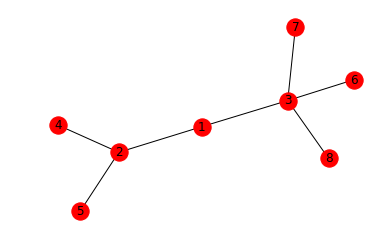

In [35]:
org_struc = nx.Graph()
org_struc.add_edges_from([(1, 2), (1, 3)])
org_struc.add_edges_from([(2, 4), (2, 5)])
org_struc.add_edges_from([(3, 6), (3, 7), (3, 8)])
pos = nx.spring_layout(org_struc)
nx.draw_networkx(org_struc)
#nx.draw_networkx_nodes(org_struc, pos=pos)
#nx.draw_networkx_edges(org_struc, pos=pos)
plt.axis('off')

print(nx.shortest_path(org_struc, 4, 8))



In [ ]:
np.random.seed(42)
env = simpy.Environment()

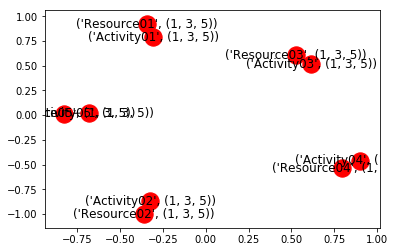

In [75]:
## resource와 activity를 bipartite한 네트워크로 구성하고, 
## activity를 수행해야 할 때는 일단 해당 activity를 수행할 수 있는 사람셋을 해당 네트워크를 통해서 찾음 
## 액티비티 종료 후 
act_resource_network = nx.Graph()
act_set = [('Activity{:0>2d}'.format(act_num), (1, 3, 5)) for act_num in range(1, 6)]
act_set
resource_set = [('Resource{:0>2d}'.format(act_num), (1, 3, 5)) for act_num in range(1, 6)]
resource_set
act_resource_network.add_edges_from([a_r for a_r in zip(act_set, resource_set)])

nx.draw_networkx(act_resource_network)

In [65]:
def process(env, process_name, activity_lst):
    print('<{}> starts at {:6.2f}'.format(process_name, env.now))
    for act, time_dist in activity_lst:
        print("{} {} start at {:6.2f}".format(process_name, act, env.now))
        left, mode, right = time_dist
        execution_time = np.random.triangular(left=left, right=right, mode=mode)
        yield env.timeout(execution_time)
        print("{} {} end at {:6.2f}".format(process_name, act, env.now))
        ## 여기서는 transfer of work이 있으므로 일을 조직구조에 따라서 일을 전달함. 
        transfer_time = np.random.triangular(left=1, right=3, mode=2)
        yield env.timeout(transfer_time)
    print('<{}> ends at {:6.2f}'.format(process_name, env.now))
    return None
###########
np.random.seed(42)
env = simpy.Environment()
def process_generator(env):
    for i in range(0, 2):
        yield env.timeout(np.random.triangular(1, 3, 5))
        env.process(process(env, 'Process{:0>2d}'.format(i), 
            [('Activity{:0>2d}'.format(act_num), (1, 3, 5)) for act_num in range(1, 6)]))

env.process(process_generator(env))
env.run(50)

<Process00> starts at   2.73
Process00 Activity01 start at   2.73
Process00 Activity01 end at   6.27
<Process01> starts at   7.10
Process01 Activity01 start at   7.10
Process00 Activity02 start at   8.37
Process01 Activity01 end at   9.22
Process00 Activity02 end at  10.49
Process01 Activity02 start at  10.56
Process00 Activity03 start at  12.97
Process01 Activity02 end at  13.77
Process01 Activity03 start at  14.98
Process00 Activity03 end at  16.44
Process00 Activity04 start at  18.86
Process01 Activity03 end at  19.49
Process01 Activity04 start at  21.09
Process00 Activity04 end at  21.17
Process00 Activity05 start at  22.95
Process01 Activity04 end at  23.30
Process01 Activity05 start at  25.23
Process00 Activity05 end at  26.00
Process01 Activity05 end at  27.76
<Process00> ends at  28.12
<Process01> ends at  29.29


In [73]:
list(zip([1,2,3], [4,5,6]))

[(1, 4), (2, 5), (3, 6)]

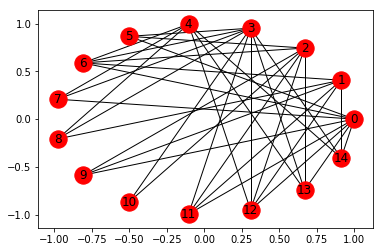

In [101]:
## bipartite graph를 예쁘게 그리는 방법이 있을 것 같은데, 
while True:
    biG = nx.bipartite.random_graph(5, 10, 0.7)
    if nx.is_connected(biG) is True:
        break
pos = nx.shell_layout(biG)
nx.draw_networkx(biG, pos=pos)

In [97]:
nx.biconnected.is_biconnected(biG)

False